In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### A. Data Loading

In [3]:
df=pd.read_csv("Mall_Customers_New.csv")

In [4]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.describe(include='object')

,Genre
count,200
unique,2
top,Female
freq,112


In [10]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values in dataset

### B. Data Cleaning

#### 1. Rename Columns

In [11]:
df.rename(columns={'Genre':'Gender','Annual Income (k$)':'Annual_Income_dollar','Spending Score (1-100)':'Spending_Score_1-100'},inplace=True)

In [12]:
df['Annual_Income_dollar'].value_counts().sort_values(ascending=False)

Annual_Income_dollar
54     12
78     12
48      6
71      6
63      6
       ..
126     2
72      2
61      2
70      2
137     2
Name: count, Length: 64, dtype: int64

#### 2. Outlier Treatment

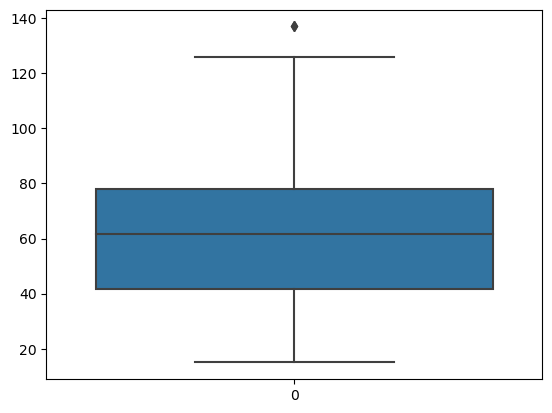

In [13]:
sns.boxplot(df['Annual_Income_dollar'])
plt.show()

In [14]:
print("Interquartile Range",78-41)
print("Upper quartile outlier value",78+(1.5*37))
print("Lower quartile outlier value",41-(1.5*37))

Interquartile Range 37
Upper quartile outlier value 133.5
Lower quartile outlier value -14.5


In [15]:
ninty_five_quntile=np.quantile(df['Annual_Income_dollar'],0.95)
Fifth_quntile=np.quantile(df['Annual_Income_dollar'],0.01)
print("95th quantile",ninty_five_quntile)
print("5th quantile",Fifth_quntile)

95th quantile 103.0
5th quantile 15.99


###### Replace outlier values with 95th & 1st quantile values

In [16]:
df['Annual_Income_dollar']=[ninty_five_quntile if i>ninty_five_quntile else i for i in df['Annual_Income_dollar']]

#### 3. Data Transformation from string to int for Genre column 

In [17]:
df['Gender']=[1 if i=='Male' else 0 for i in df['Gender']]

#### 4. Age Grouping

In [18]:
bins= [18,30,45,65,80]
labels = ['18-30','31-45','46-65','66-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [19]:
df.head()

,CustomerID,Gender,Age,Annual_Income_dollar,Spending_Score_1-100,AgeGroup
0,1,1,19,15.0,39,18-30
1,2,1,21,15.0,81,18-30
2,3,0,20,16.0,6,18-30
3,4,0,23,16.0,77,18-30
4,5,0,31,17.0,40,31-45


#### 5. Data Transformation

In [20]:
df1=pd.get_dummies(df['AgeGroup'])

In [21]:
df1=df1*1

In [22]:
df_Final=pd.concat([df,df1],axis=1)

In [23]:
df_Final.head()

,CustomerID,Gender,Age,Annual_Income_dollar,Spending_Score_1-100,AgeGroup,18-30,31-45,46-65,66-80
0,1,1,19,15.0,39,18-30,1,0,0,0
1,2,1,21,15.0,81,18-30,1,0,0,0
2,3,0,20,16.0,6,18-30,1,0,0,0
3,4,0,23,16.0,77,18-30,1,0,0,0
4,5,0,31,17.0,40,31-45,0,1,0,0


#### 4. Drop CustomerID & Original Age column which is not necessary for model building

In [24]:
df_Final.drop(['CustomerID','Age','AgeGroup'],axis=1,inplace=True)

In [25]:
df_Final.head()

,Gender,Annual_Income_dollar,Spending_Score_1-100,18-30,31-45,46-65,66-80
0,1,15.0,39,1,0,0,0
1,1,15.0,81,1,0,0,0
2,0,16.0,6,1,0,0,0
3,0,16.0,77,1,0,0,0
4,0,17.0,40,0,1,0,0


### C. Model Building

In [26]:
X=df_Final.iloc[:,[3,4]].values

In [27]:
from sklearn.cluster import KMeans
wcss=[]

In [28]:
for i in range(1,11):
    Kmeans=KMeans(n_clusters= i, init='k-means++', random_state=0)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

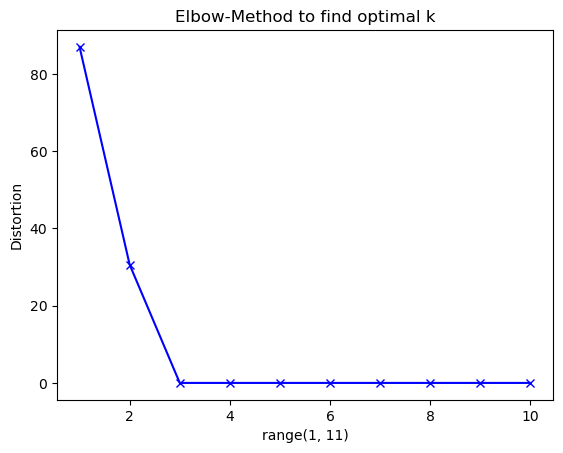

In [29]:
plt.plot(range(1,11),wcss,'bx-')
plt.xlabel(range(1,11))
plt.ylabel('Distortion')
plt.title('Elbow-Method to find optimal k')
plt.show()

In [30]:
kmeans=KMeans(n_clusters=3,random_state=123)
kmeans.fit(df_Final)
labels=kmeans.labels_

##### silhouette_score : This is second method to determine the optimal number of k

In [31]:
from sklearn.metrics import silhouette_score,silhouette_samples

In [32]:
silhouette_score(df_Final,labels,random_state=123)

0.4714563375742929

In [33]:
df_Final["label"]=labels
df_Final.tail()

,Gender,Annual_Income_dollar,Spending_Score_1-100,18-30,31-45,46-65,66-80,label
195,0,103.0,79,0,1,0,0,0
196,0,103.0,28,0,0,1,0,2
197,1,103.0,74,0,1,0,0,0
198,1,103.0,18,0,1,0,0,2
199,1,103.0,83,0,1,0,0,0


#### Analysing the cluster profile

In [34]:
clust_profile=df_Final
clust_profile=clust_profile.groupby('label').mean()
clust_profile['Total_Customer']=df_Final.label.value_counts().sort_index()
clust_profile

,Gender,Annual_Income_dollar,Spending_Score_1-100,18-30,31-45,46-65,66-80,Total_Customer
label,,,,,,,,
0,0.461538,84.384615,82.128205,0.205128,0.794872,0.000000,0.000000,39
1,0.406504,44.154472,49.829268,0.325203,0.227642,0.333333,0.113821,123
2,0.526316,84.789474,18.631579,0.184211,0.447368,0.368421,0.000000,38


In [35]:
df_gen_0=df_Final[df_Final['label']==0]
df_gen_1=df_Final[df_Final['label']==1]
df_gen_2=df_Final[df_Final['label']==2]

In [36]:
df_gen_0['Gender'].value_counts() # In 0th Cluster there are 21 Females & 18 Males

Gender
0    21
1    18
Name: count, dtype: int64

In [37]:
df_gen_1['Gender'].value_counts() # In 1st Cluster there are 73 Females & 50 Males

Gender
0    73
1    50
Name: count, dtype: int64

In [38]:
df_gen_2['Gender'].value_counts() # In 2nd Cluster there are 18 Females & 20 Males

Gender
1    20
0    18
Name: count, dtype: int64

In [39]:
df_Final.head()

,Gender,Annual_Income_dollar,Spending_Score_1-100,18-30,31-45,46-65,66-80,label
0,1,15.0,39,1,0,0,0,1
1,1,15.0,81,1,0,0,0,1
2,0,16.0,6,1,0,0,0,1
3,0,16.0,77,1,0,0,0,1
4,0,17.0,40,0,1,0,0,1


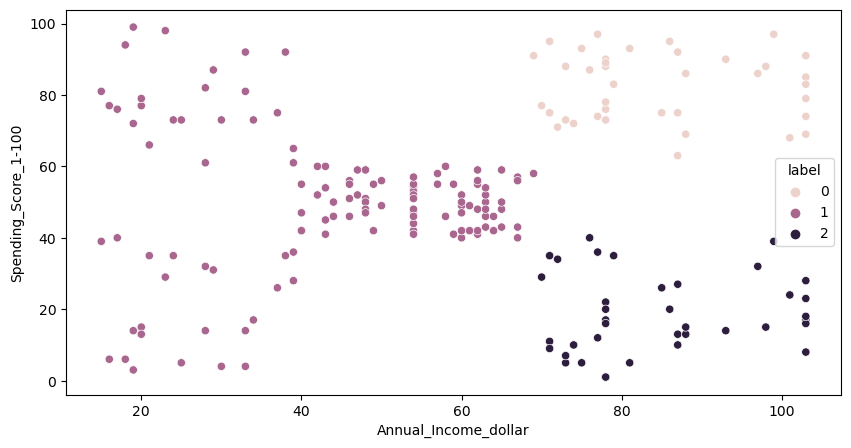

In [40]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df_Final, x = 'Annual_Income_dollar', y = 'Spending_Score_1-100', hue = df_Final['label'])
plt.show()